# UC Merced dataset: Example of the `aitlas` toolbox for multi label image classification

This notebook shows a sample implementation of a multi label image classification using the `aitlas` toolbox using the UC merced multi label dataset.

In [1]:
from aitlas.datasets import UcMercedMultiLabelDataset
from aitlas.models import ResNet50MultiLabel
from aitlas.transforms import ResizeCenterCropFlipHVToTensor, ResizeCenterCropToTensor
from aitlas.utils import image_loader

## Load the dataset

In [2]:
dataset_config = {
    "data_dir": "/media/hdd/multi-label/UCMerced_multilabel/images",
    "csv_file": "/media/hdd/multi-label/UCMerced_multilabel/multilabels.txt"
}
dataset = UcMercedMultiLabelDataset(dataset_config)

## Show images from the dataset

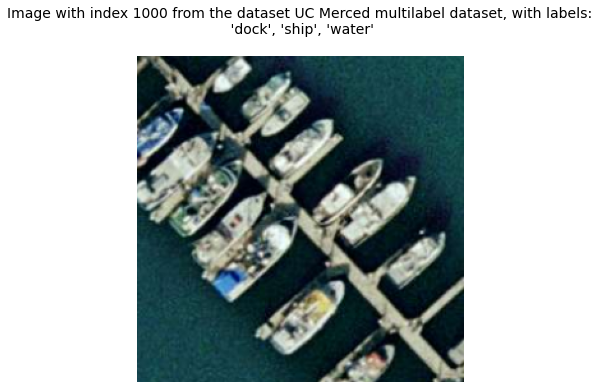

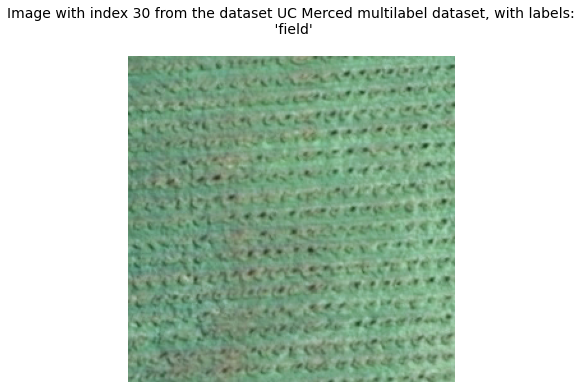

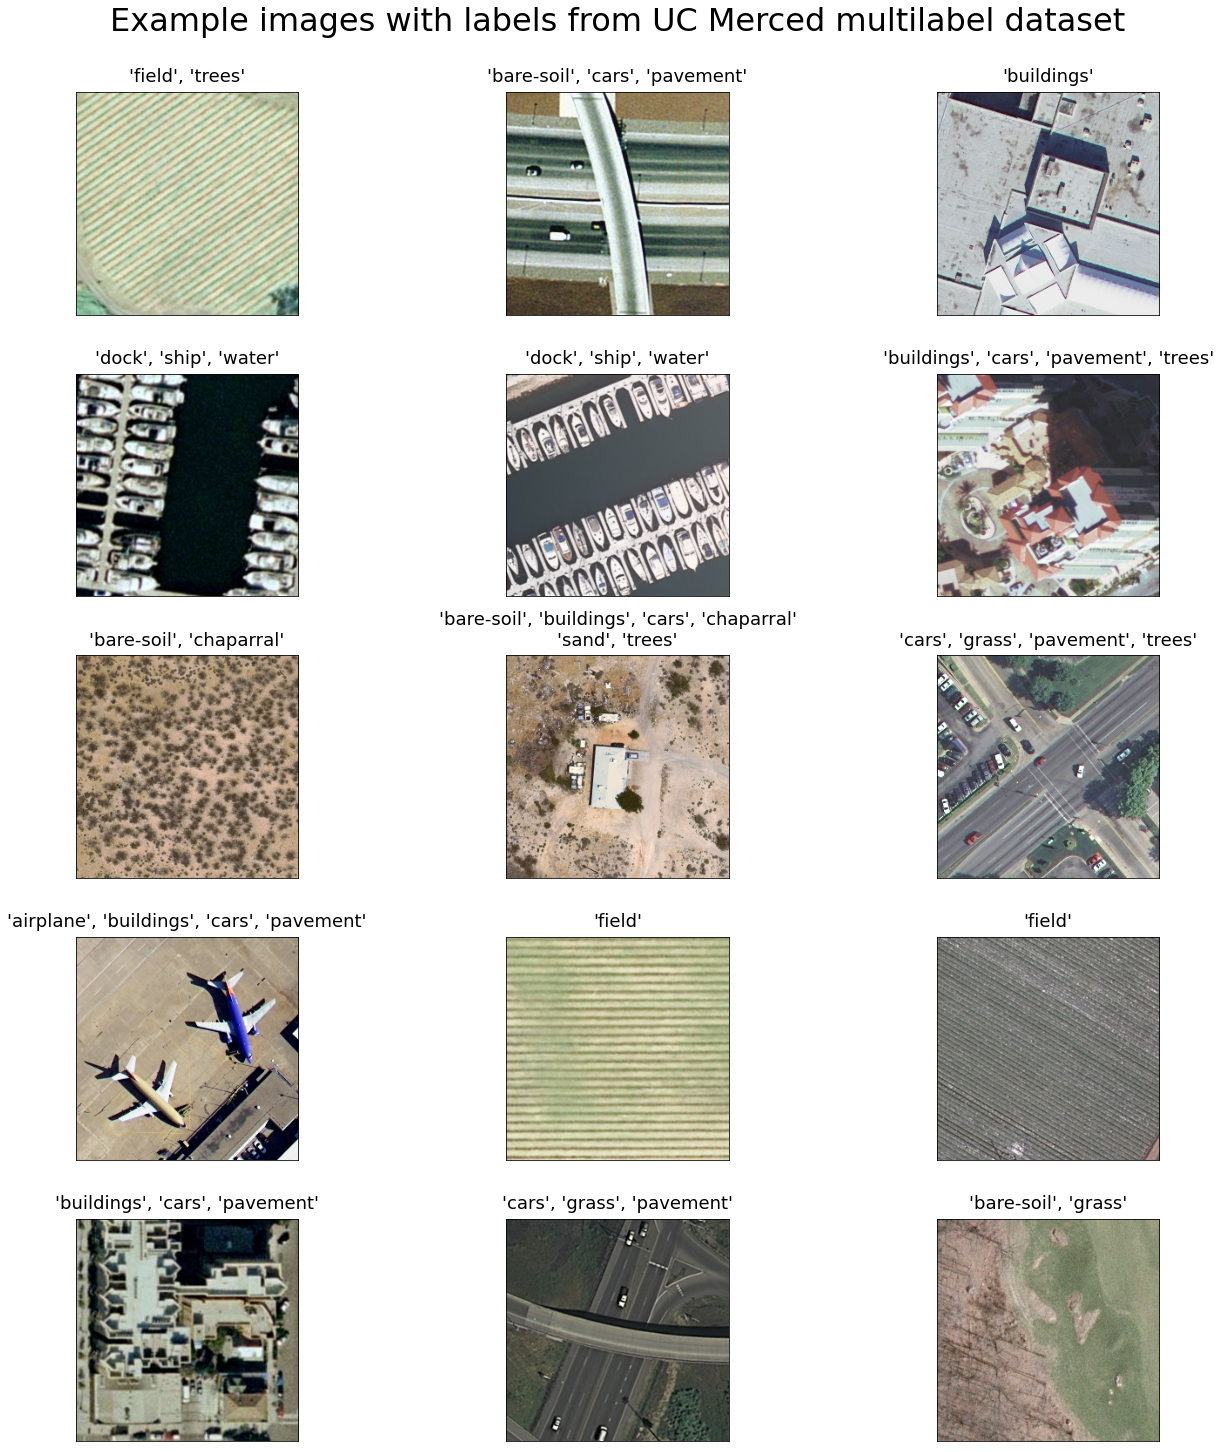

In [3]:
fig1 = dataset.show_image(1000)
fig2 = dataset.show_image(30)
fig3 = dataset.show_batch(15)

## Inspect the data

In [4]:
dataset.show_samples()

,IMAGE\LABEL,airplane,bare-soil,buildings,cars,chaparral,court,dock,field,grass,mobile-home,pavement,sand,sea,ship,tanks,trees,water
0,agricultural00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,agricultural01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,agricultural02,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,agricultural03,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,agricultural04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,agricultural05,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,agricultural06,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,agricultural07,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,agricultural08,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,agricultural09,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [5]:
dataset.data_distribution_table()

,Label,Count
1,airplane,100
2,bare-soil,718
3,buildings,691
4,cars,886
5,chaparral,115
6,court,105
7,dock,100
8,field,103
9,grass,975
10,mobile-home,102


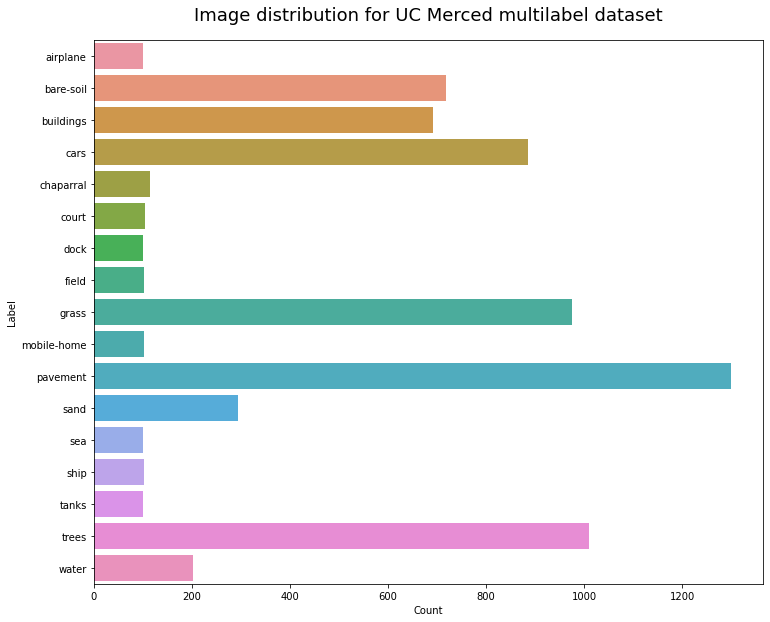

In [6]:
fig = dataset.data_distribution_barchart()

## Load train and test splits

In [7]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/media/hdd/multi-label/UCMerced_multilabel/images",
    "csv_file": "/media/hdd/multi-label/UCMerced_multilabel/train.csv"
}

train_dataset = UcMercedMultiLabelDataset(train_dataset_config)
train_dataset.transform = ResizeCenterCropFlipHVToTensor() 

test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/media/hdd/multi-label/UCMerced_multilabel/images",
    "csv_file": "/media/hdd/multi-label/UCMerced_multilabel/test.csv",
    "transforms": ["aitlas.transforms.ResizeCenterCropToTensor"]
}

test_dataset = UcMercedMultiLabelDataset(test_dataset_config)
len(train_dataset), len(test_dataset)

(1683, 417)

## Setup and create the model for training

In [2]:
epochs = 10
model_directory = "/media/hdd/multi-label/UCMerced_multilabel/experiments/"
model_config = {
    "num_classes": 17, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5, 
    "metrics": ["accuracy", "precision", "recall", "f1_score"]
}
model = ResNet50MultiLabel(model_config)
model.prepare()

## Training and evaluation

In [ ]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    val_dataset=test_dataset,
    run_id='1',
)

## Predictions

2021-11-24 21:50:52,611 INFO Loading checkpoint /media/ssd/aitlas_new/examples/experiment/uc_merced_test/checkpoint.pth.tar
2021-11-24 21:50:52,796 INFO Loaded checkpoint /media/ssd/aitlas_new/examples/experiment/uc_merced_test/checkpoint.pth.tar at epoch 51


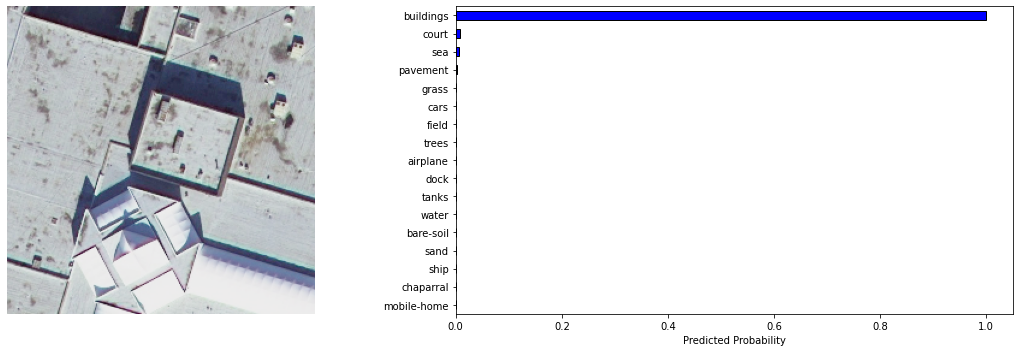

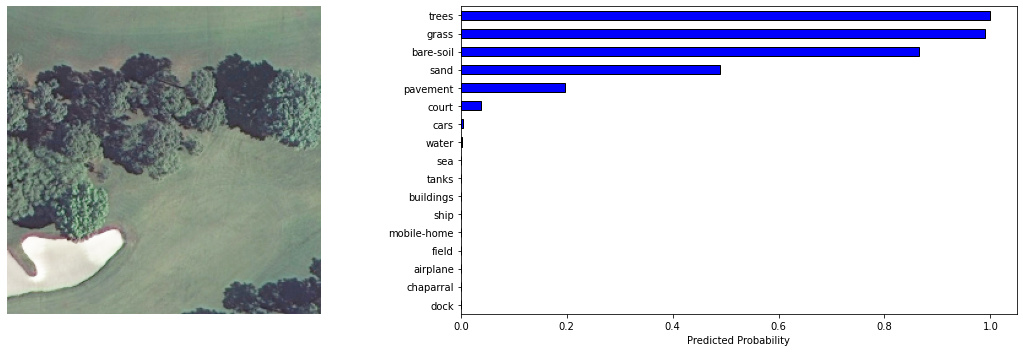

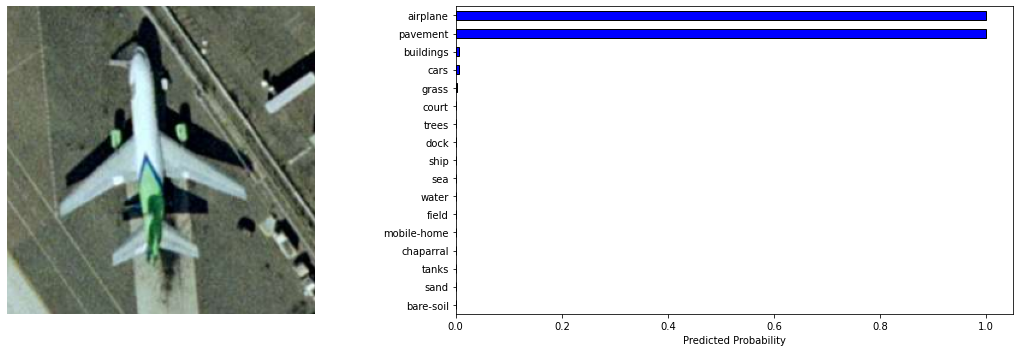

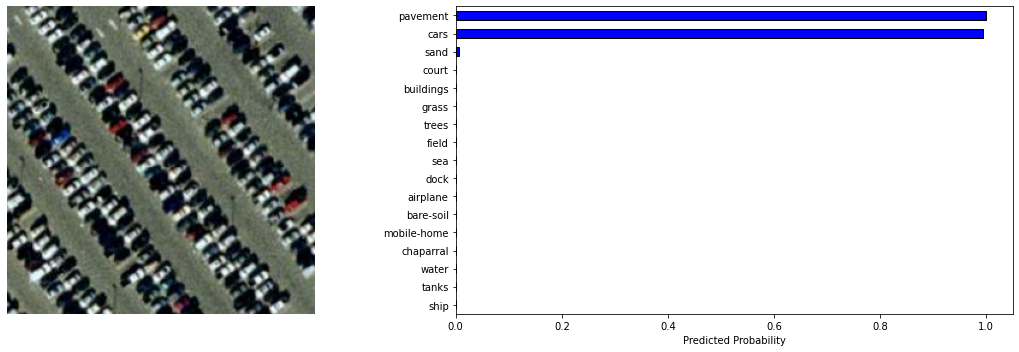

In [3]:
model_path = "/media/ssd/aitlas_new/examples/experiment/uc_merced_test/checkpoint.pth.tar"
#labels = UcMercedMultiLabelDataset.labels
labels = ["airplane", "bare-soil", "buildings", "cars", "chaparral", "court", "dock", "field", "grass",
                "mobile-home", "pavement", "sand", "sea", "ship", "tanks", "trees", "water"]
transform = ResizeCenterCropToTensor()
model.load_model(model_path)

image = image_loader('/media/ssd/uc_merced_multilabel/predict/buildings98.tif')
fig = model.predict_image(image, labels, transform)

image = image_loader('/media/ssd/uc_merced_multilabel/predict/golfcourse04.tif')
fig = model.predict_image(image, labels, transform)

image = image_loader('/media/ssd/uc_merced_multilabel/predict/airplane18.tif')
fig = model.predict_image(image, labels, transform)

image = image_loader('/media/ssd/uc_merced_multilabel/predict/parkinglot13.tif')
fig = model.predict_image(image, labels, transform)